<a href="https://colab.research.google.com/github/PaulNjinu254/Iris-Data-Analysis/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
First four samples:
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_widt

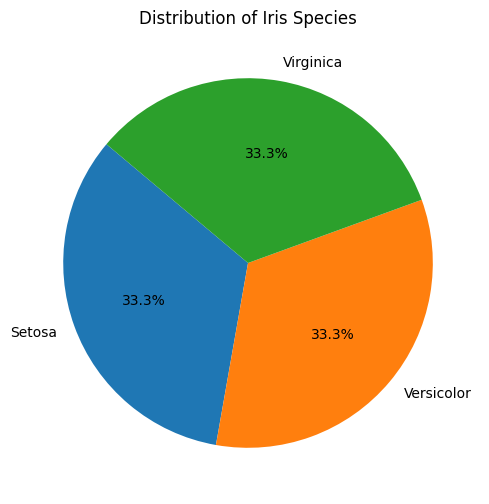

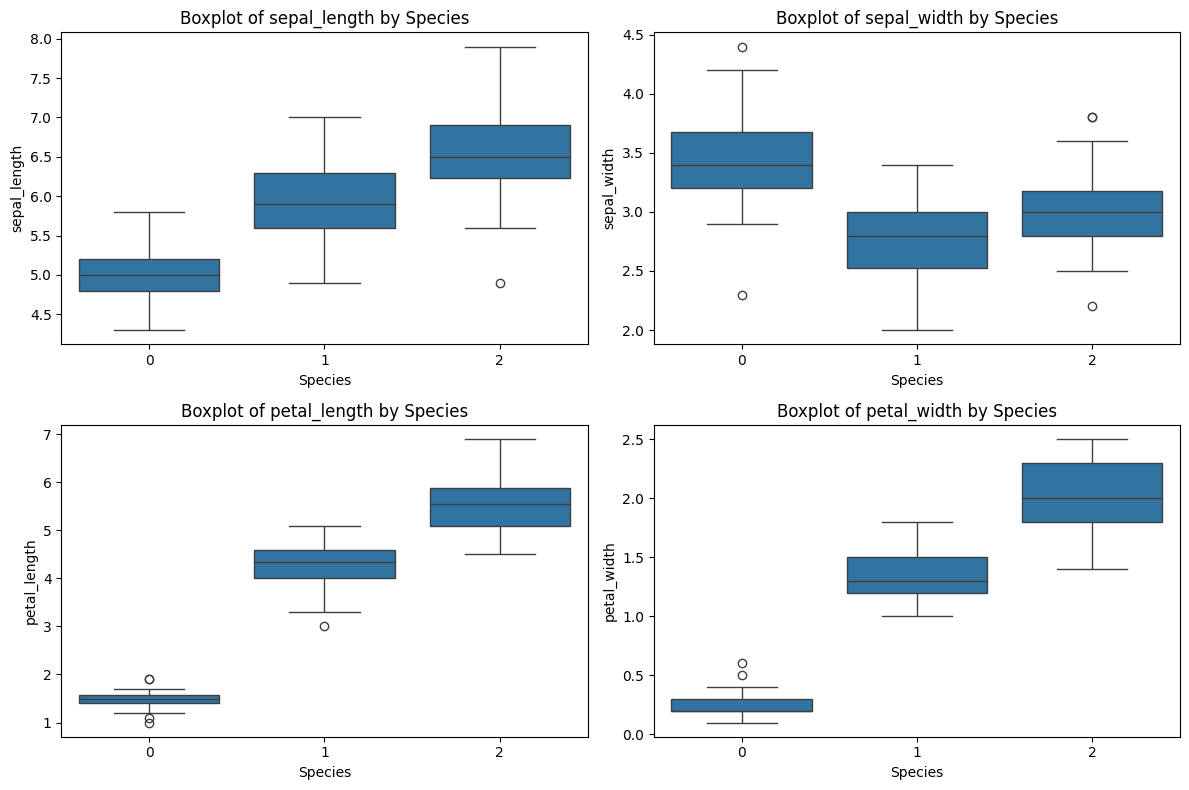

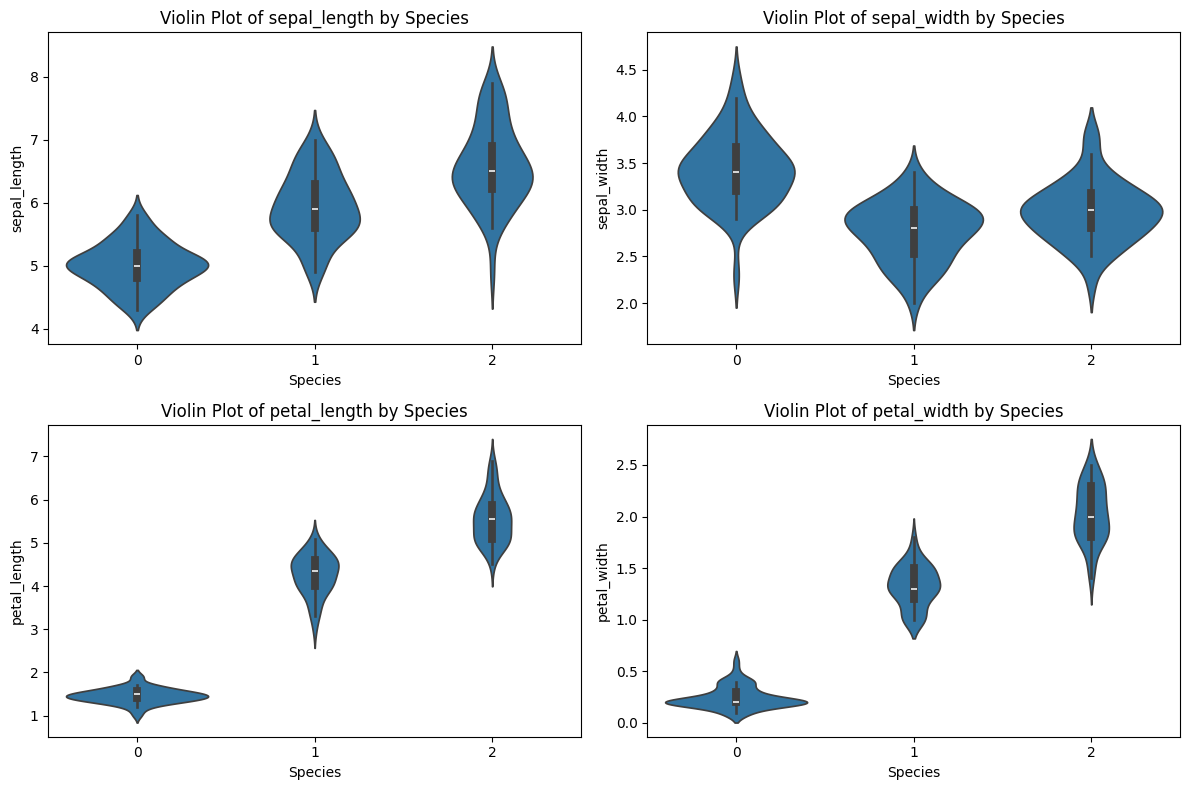

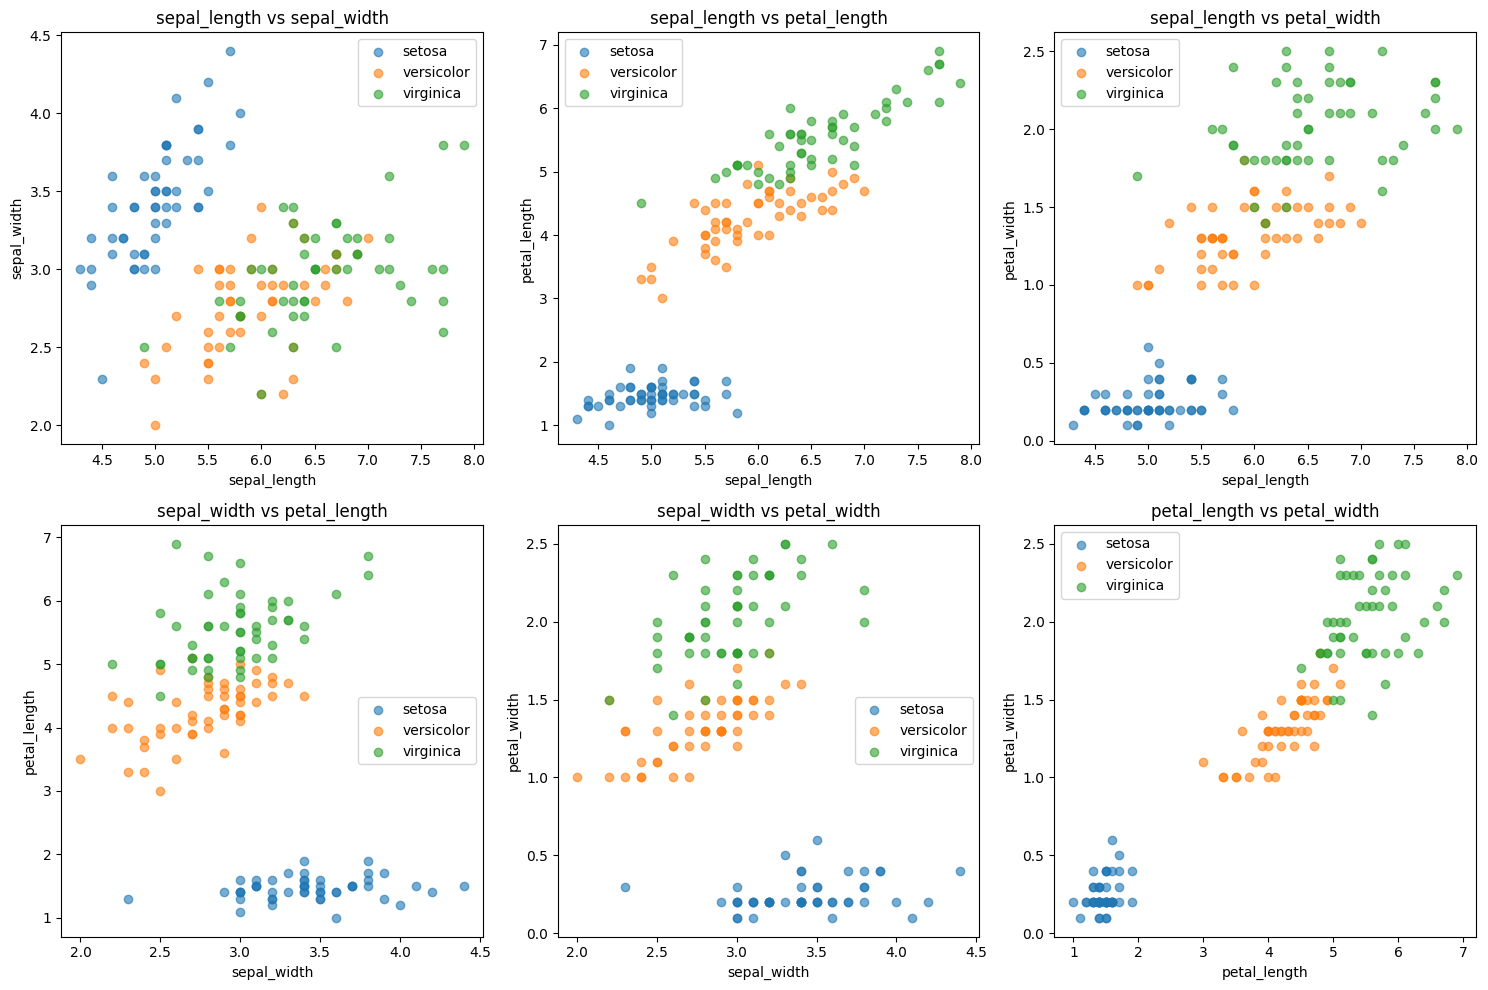

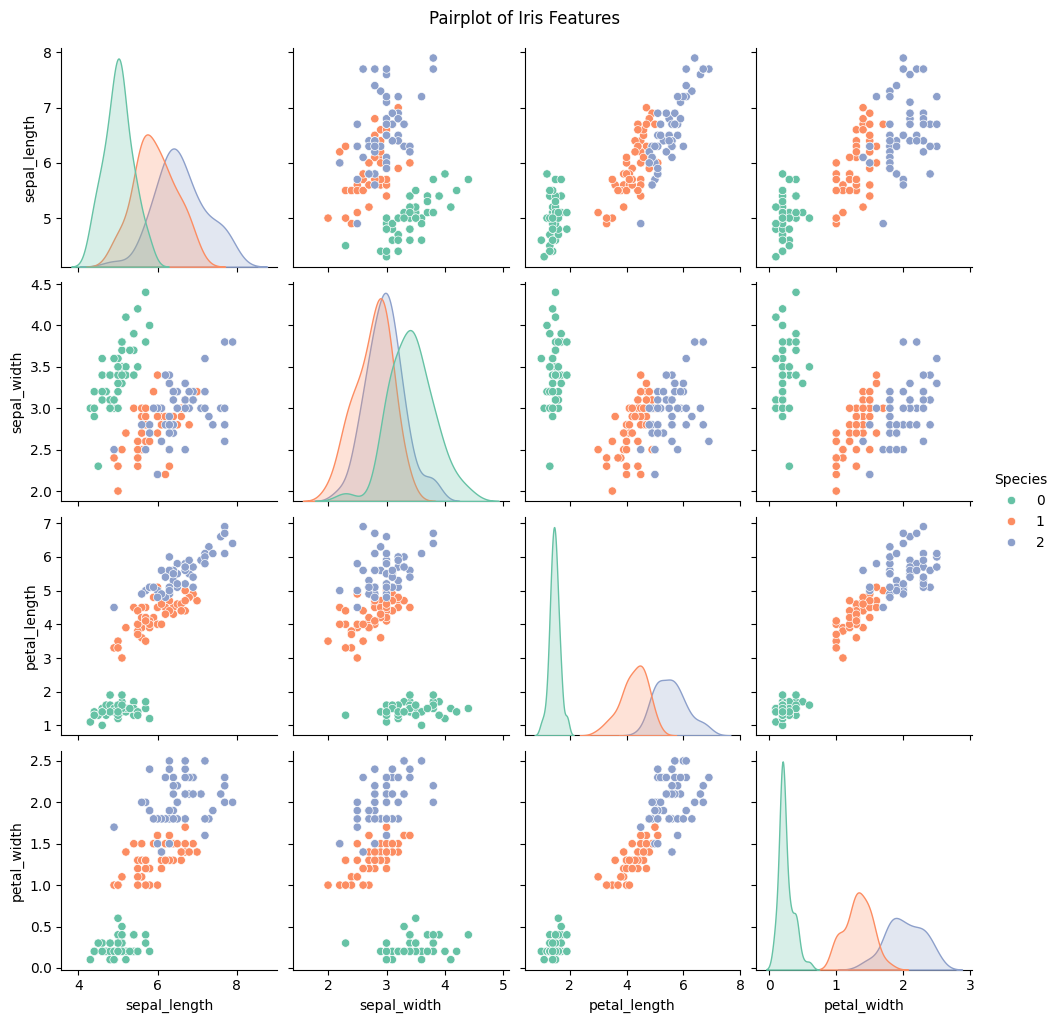

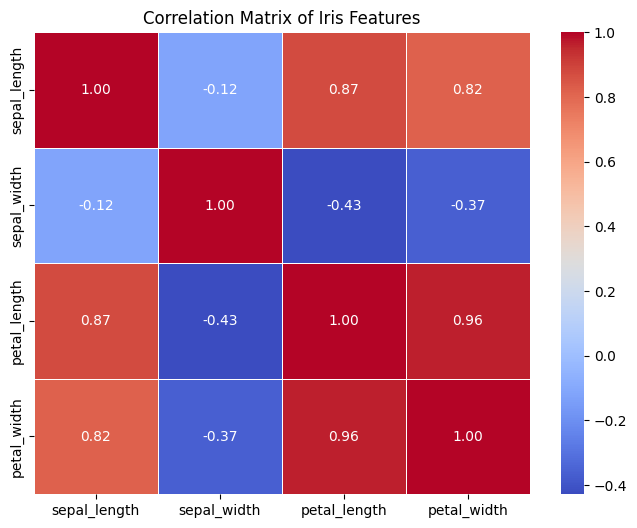

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

y = pd.DataFrame(data=iris.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
print(df.head())

print("First four samples:")
print(df.head(4))

# Check data types and non-null counts
print("\nDataFrame info:")
print(df.info())

# Count of each unique value in the target variable
print("\nSpecies value counts:")
print(df['Species'].value_counts())

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Descriptive statistics for all features
print("\nDescriptive statistics:")
print(df.describe())

# Extract 'sepal_width' column in two ways
sepal_width_1 = df['sepal_width']
sepal_width_2 = df.iloc[:, 1]

# Extract rows from 50 to 99
df_50_99 = df.iloc[50:100]

# Extract 'petal_length' from rows 50 to 99
petal_length_50_99 = df.iloc[50:100, 2]

# Extract rows where 'petal_width' == 0.2
petal_width_02 = df[df['petal_width'] == 0.2]

# Pie Chart of Target Variable Distribution
species_counts = df['Species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=['Setosa', 'Versicolor', 'Virginica'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()

# Box Plots by Species
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f'Boxplot of {col} by Species')
plt.tight_layout()
plt.show()

# Violin Plots by Species
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Species', y=col, data=df)
    plt.title(f'Violin Plot of {col} by Species')
plt.tight_layout()
plt.show()

# Scatter Plots of Feature Pairs
colors = ['red', 'green', 'blue']
plt.figure(figsize=(15, 10))
for i, (feat1, feat2) in enumerate(itertools.combinations(X.columns, 2)):
    plt.subplot(2, 3, i+1)
    for j in range(3):
        subset = df[df['Species'] == j]
        plt.scatter(subset[feat1], subset[feat2], label=iris.target_names[j], alpha=0.6)
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title(f'{feat1} vs {feat2}')
    plt.legend()
plt.tight_layout()
plt.show()

# Scatterplot Matrix (Pairplot)
sns.pairplot(df, hue='Species', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation Matrix and Heatmap
correlation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()